## APRENDIZADO POR REFORÇO


Desenvolvedores: João Pedro Tavares Santos e Rodrigo Guedes

#### Descrição:
Elaborar um problema para ser resolvido com o algoritmo Q-Learning de aprendizado por
reforço. Utilizar a biblioteca (https://gymnasium.farama.org/) para implementar a solução
para o problema proposto.

O problema escolhido foi o ambiente ["Frozenlake"](https://gymnasium.farama.org/environments/toy_text/frozen_lake/#frozen-lake)

- Importa as bibliotecas necessárias

In [16]:
import gym 
import numpy as np
import matplotlib.pyplot as plt


- Cria o ambiente "FrozenLake"

In [17]:
#env = gym.make('FrozenLake-v1', desc=generate_random_map(size=4))

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
env.reset()

(0, {'prob': 1})

- Define a tabela Q como um array de zeros

In [18]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

- Define os parâmetros do algoritmo

In [19]:
learning_rate = 0.1
discount_factor = 0.99
num_episodes = 250

- Implementa o algoritmo Q-Learning

In [20]:
rewards_per_episode = []
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    
    while not done:
        # Escolher uma ação usando a política epsilon-greedy
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])
        
        else: 
            action = env.action_space.sample()
        
        new_state, reward, done, info, _ = env.step(action)
        total_reward += reward
        
        # Atualizar a tabela Q usando a fórmula do Q-Learning
        q_table[int(state), action] = (1 - learning_rate) * q_table[int(state), action] + learning_rate * (reward + discount_factor * np.max(q_table[int(new_state), :]))
                
        state = new_state
    rewards_per_episode.append(total_reward)
    print(f"Episódio {episode + 1} - Recompensa: {total_reward}")

Episódio 1 - Recompensa: 0.0
Episódio 2 - Recompensa: 0.0
Episódio 3 - Recompensa: 0.0
Episódio 4 - Recompensa: 0.0
Episódio 5 - Recompensa: 0.0
Episódio 6 - Recompensa: 0.0
Episódio 7 - Recompensa: 0.0
Episódio 8 - Recompensa: 0.0
Episódio 9 - Recompensa: 0.0


KeyboardInterrupt: 

In [ ]:
import time

labels = [
    "0: Move left",
    "1: Move down",
    "2: Move right",
    "3: Move up"
]

for i in range(5):
    print(f"iniciando tentativa {i}")
    done = False
    state = env.reset()[0]
    nb_succes = 0

    while not done:
        if np.max(q_table[int(state)]) > 0:
            action = np.argmax(q_table[state])
        
        else: 
            action = env.action_space.sample()
        
        new_state, reward, done, info, _ = env.step(action)

        state = new_state

        nb_succes += reward
        print(labels[action])
        env.render()
        time.sleep(5)

iniciando tentativa 0
1: Move down
1: Move down
2: Move right
1: Move down
2: Move right
2: Move right
iniciando tentativa 1
1: Move down
1: Move down
2: Move right
1: Move down
2: Move right
2: Move right
iniciando tentativa 2
1: Move down
1: Move down
2: Move right
1: Move down
2: Move right
2: Move right
iniciando tentativa 3
1: Move down
1: Move down
2: Move right
1: Move down
2: Move right
2: Move right
iniciando tentativa 4
1: Move down
1: Move down
2: Move right
1: Move down
2: Move right
2: Move right


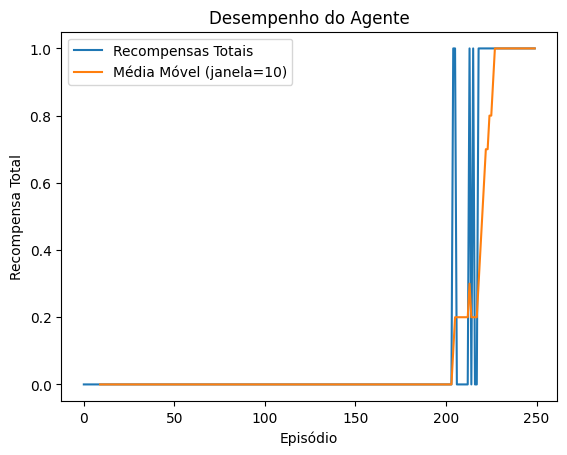

In [ ]:
window_size = 10
moving_average_rewards = [np.mean(rewards_per_episode[i:i+window_size]) for i in range(len(rewards_per_episode) - window_size + 1)]

# Plotar o gráfico de desempenho do agente ao longo dos episódios
plt.plot(rewards_per_episode, label='Recompensas Totais')
plt.plot(np.arange(window_size - 1, len(rewards_per_episode)), moving_average_rewards, label='Média Móvel (janela=10)')
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.title('Desempenho do Agente')
plt.legend()
plt.show()